In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install Adam



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np



In [5]:
labels = ['rugby', 'soccer']
img_size = 224
#data_dir="/content/drive/MyDrive/data_dir"
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [6]:
#Now we can easily fetch our train and validation data.
train = get_data('/content/drive/MyDrive/Colab Notebooks/input/train')
val = get_data('/content/drive/MyDrive/Colab Notebooks/input/test')
 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  app.launch_new_instance()


In [7]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)


In [8]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [9]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [10]:
opt = Adam(learning_rate=0.0001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])


In [12]:
history = model.fit(x_train,y_train,epochs = 10 , validation_data = (x_val, y_val))


Epoch 1/10
77/77 [==============================] - 160s 2s/step - loss: 0.6423 - accuracy: 0.6311 - val_loss: 0.5582 - val_accuracy: 0.7639
Epoch 2/10
77/77 [==============================] - 159s 2s/step - loss: 0.5560 - accuracy: 0.7279 - val_loss: 0.4796 - val_accuracy: 0.8164
Epoch 3/10
77/77 [==============================] - 166s 2s/step - loss: 0.5239 - accuracy: 0.7422 - val_loss: 0.4676 - val_accuracy: 0.8148
Epoch 4/10
77/77 [==============================] - 164s 2s/step - loss: 0.4630 - accuracy: 0.7904 - val_loss: 0.4321 - val_accuracy: 0.8262
Epoch 5/10
77/77 [==============================] - 164s 2s/step - loss: 0.4392 - accuracy: 0.7974 - val_loss: 0.4798 - val_accuracy: 0.7902
Epoch 6/10
77/77 [==============================] - 170s 2s/step - loss: 0.4055 - accuracy: 0.8264 - val_loss: 0.4498 - val_accuracy: 0.8082
Epoch 7/10
77/77 [==============================] - 166s 2s/step - loss: 0.3745 - accuracy: 0.8444 - val_loss: 0.4128 - val_accuracy: 0.8361
Epoch 8/10
77

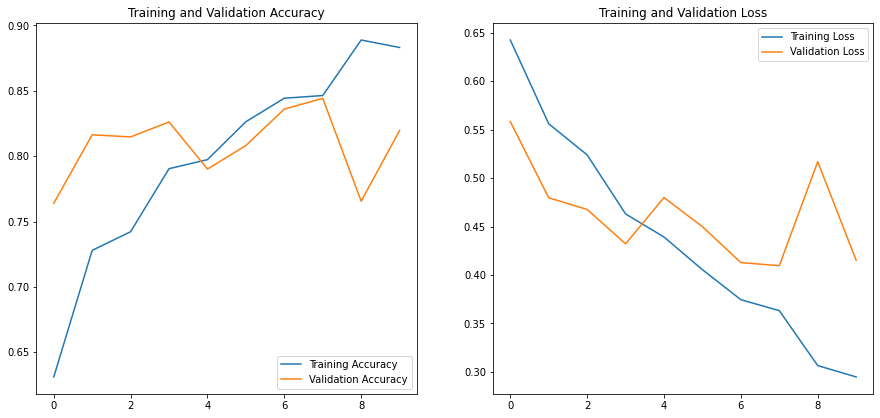

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
#predictions = model.predict(x_val)
#print(predictions.shape)
#print(predictions)
#np.reshape(predictions,610)
#predictions=np.delete(predictions,0,1)
#print(predictions.shape)
#predictions = predictions.reshape(1,-1)[0]
#print(predictions.shape)
#print(predictions)
#print(y_val.shape)
#print(y_val)

#predictions = model.predict(x_val)

#new_predictions = []
#for i in range(610):
#  if(predictions[i][0] > predictions[i][1]):
#    new_predictions.append(0) 
 # else:  
  #  new_predictions.append(1)

#predictions = np.array(new_predictions)

#print(predictions.shape)
#print(y_val.shape)
predict_x=model.predict(x_val)
classes_x=np.argmax(predict_x,axis=1)
predictions=classes_x.reshape(1,-1)[0]
print(classification_report(y_val,predictions, target_names = ['Rugby (Class 0)','Soccer (Class 1)']))



                  precision    recall  f1-score   support

 Rugby (Class 0)       0.83      0.80      0.82       305
Soccer (Class 1)       0.81      0.84      0.82       305

        accuracy                           0.82       610
       macro avg       0.82      0.82      0.82       610
    weighted avg       0.82      0.82      0.82       610



Task 1: Run the above code with given dataset.

Task 2: Run the code with different dataset




